In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import tensorflow as tf
tf.__version__

'2.3.1'

In [183]:
np.random.seed(10)
tf.compat.v1.set_random_seed(10)

In [184]:
# Cargo los csv
df_local = pd.read_csv("./unified-lightcurves-local.csv").iloc[:, 1:]

display(df_local)

,kepid,kepler_name,kepoi_name,koi_disposition,light_flux_0001,light_flux_0002,light_flux_0003,light_flux_0004,light_flux_0005,light_flux_0006,...,light_flux_0092,light_flux_0093,light_flux_0094,light_flux_0095,light_flux_0096,light_flux_0097,light_flux_0098,light_flux_0099,light_flux_0100,light_flux_0101
0,10797460.0,Kepler-227 b,K00752.01,1,1.727321,0.728728,1.125654,1.229677,1.327881,1.390140,...,1.318587,1.390135,0.968716,1.285568,1.216662,0.874477,1.627442,0.960296,0.998560,1.489279
1,10811496.0,NaN,K00753.01,0,1.044298,0.961948,1.000986,0.983043,0.983156,1.037890,...,1.023945,0.999707,0.986407,0.980490,1.018677,0.976698,0.933617,1.067080,1.002989,1.012337
2,10848459.0,NaN,K00754.01,0,-0.289601,-0.370998,-0.441931,-0.410758,-0.379353,-0.507287,...,-0.445697,-0.442599,-0.365730,-0.381951,-0.287742,-0.285504,-0.269432,-0.261419,-0.224786,-0.308863
3,10854555.0,Kepler-664 b,K00755.01,1,-0.066347,-0.019535,0.481834,-0.052898,-0.000501,0.402655,...,-0.620233,-0.403630,-0.347501,-0.388085,-0.302855,-0.130258,-0.042718,0.674248,-0.583962,0.165856
4,10872983.0,Kepler-228 d,K00756.01,1,0.910853,0.953313,1.121489,0.641881,1.222616,0.878186,...,1.040783,0.863073,1.246061,0.969055,1.318099,1.276269,1.092889,0.842558,1.081244,0.972349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,10031643.0,NaN,K07984.01,0,1.326015,-0.237976,1.031217,1.533878,0.628377,1.317783,...,0.231072,0.877314,1.741571,1.331278,1.134218,1.485683,0.323981,-0.605954,0.691033,1.012538
6091,10090151.0,NaN,K07985.01,0,-0.818461,-0.582961,-0.804967,-0.881438,-0.608308,-0.630170,...,-0.821112,-0.787683,-0.549940,-0.806678,-0.688768,-0.796852,-0.617750,-0.695399,-0.710079,-0.551582
6092,10128825.0,NaN,K07986.01,0,-0.202417,-0.490636,0.925138,0.894101,1.454064,-0.070774,...,1.194394,-0.265945,-0.643078,0.907540,1.074063,1.982618,0.704504,1.937049,0.038070,1.604524
6093,10147276.0,NaN,K07987.01,0,0.650887,0.889116,0.758458,0.425697,0.726841,1.090262,...,0.987756,0.594261,0.684510,1.125490,0.726558,0.479359,-0.267394,0.273248,1.216787,0.561130


In [185]:
local_fluxes = df_local.iloc[:,4:]
local_labels = df_local.iloc[:,3]

## Particionado de datos

In [186]:
x_local_train, x_local_test, y_local_train, y_local_test = train_test_split(
    local_fluxes, local_labels, test_size=0.3, random_state=11)

In [187]:
print(x_local_train.shape, x_local_test.shape, y_local_train.shape, y_local_test.shape)

(4266, 101) (1829, 101) (4266,) (1829,)


In [188]:
#Definimos las dimensiones
n_outputs = 1
n_local_timesteps, n_local_features  = x_local_train.shape[0], x_local_train.shape[1]

In [189]:
print(n_local_timesteps, n_local_features)

4266 101


In [190]:
#Expandimos las dimensiones de train 
x_local_extended_train = np.expand_dims(x_local_train,axis=-1) 
y_local_extended_train = np.array(y_local_train)

In [191]:
print(x_local_train.shape, y_local_train.shape)
print(x_local_extended_train.shape, y_local_extended_train.shape)

(4266, 101) (4266,)
(4266, 101, 1) (4266,)


In [192]:
#Expandimos las dimensiones de test
x_local_extended_test = np.expand_dims(x_local_test,axis=-1)
y_local_extended_test = np.array(y_local_test)

In [193]:
print(x_local_test.shape, y_local_test.shape)
print(x_local_extended_test.shape, y_local_extended_test.shape)

(1829, 101) (1829,)
(1829, 101, 1) (1829,)


## Construcción Red Neuronal

### Red para vistas locales

In [194]:
# first input model
inputLocalView = tf.keras.layers.Input(shape=(n_local_features, 1))
inputLocalView.set_shape([n_local_timesteps, n_local_features, 1]) # 4266 x 101

CL1 = tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu')(inputLocalView)
CL2 = tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu')(CL1)

ML1 = tf.keras.layers.MaxPooling1D(pool_size=7, strides=2)(CL2)

CL3 = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu')(ML1)
CL4 = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu')(CL3)

ML2 = tf.keras.layers.MaxPooling1D(pool_size=7, strides=2)(CL4)

flat1 = tf.keras.layers.Flatten()(ML2)

### Unificación de redes

In [195]:
output_activation = 'tanh' # tanh / sigmoid / relu #
output_optimizer = 'adamax' # adam / #
rrnn = 'localV2'

basefolder = "trainings/" + rrnn + "_" + output_activation + "-" + output_optimizer 
basepath = basefolder + "/" + rrnn + "_" + output_activation + "-" + output_optimizer

In [196]:
# interpretation model
hidden1 = tf.keras.layers.Dense(256, activation='relu')(flat1)
hidden2 = tf.keras.layers.Dense(256, activation='relu')(hidden1)
hidden3 = tf.keras.layers.Dense(256, activation='relu')(hidden2)
hidden4 = tf.keras.layers.Dense(256, activation='relu')(hidden3)

In [197]:
output = tf.keras.layers.Dense(n_outputs, activation=output_activation)(hidden4)

model = tf.keras.Model(inputs=inputLocalView, outputs=output)
model.compile(loss='binary_crossentropy', optimizer=output_optimizer, metrics=['accuracy'])

print(model.summary())

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(4266, 101, 1)]          0         
_________________________________________________________________
conv1d_28 (Conv1D)           (4266, 97, 16)            96        
_________________________________________________________________
conv1d_29 (Conv1D)           (4266, 93, 16)            1296      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (4266, 44, 16)            0         
_________________________________________________________________
conv1d_30 (Conv1D)           (4266, 40, 32)            2592      
_________________________________________________________________
conv1d_31 (Conv1D)           (4266, 36, 32)            5152      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (4266, 15, 32)          

In [198]:
# Establecemos callbacks para guardad los pasos
checkpoint_path = basepath + "-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=0, 
    save_weights_only=True,
    save_freq='epoch'
)

os.makedirs(checkpoint_dir, exist_ok=True)

In [199]:
# checkpoint_path.format(epoch=0)
latest = tf.train.latest_checkpoint(basefolder)
latest

In [200]:
if latest:
    model.load_weights(latest)
else :
    # divisores 4266: 1, 2, 3, 6, 9, 18, 27, 54, 79, 158, 237, 474, 711, 1422, 2133, 4266
    bs = 237
    Ajuste = model.fit(
        x_local_extended_train, 
        y_local_extended_train, 
        epochs=50, 
        batch_size=bs,
        
        # validation_data=(test_images,test_labels),
        callbacks=[cp_callback],
    )

Epoch 1/50
18/18 [==============================] - 1s 36ms/step - loss: 0.7295 - accuracy: 0.7525
Epoch 2/50
18/18 [==============================] - 1s 36ms/step - loss: 0.4975 - accuracy: 0.7679
Epoch 3/50
18/18 [==============================] - 1s 37ms/step - loss: 0.4800 - accuracy: 0.7766
Epoch 4/50
18/18 [==============================] - 1s 36ms/step - loss: 0.4591 - accuracy: 0.7911
Epoch 5/50
18/18 [==============================] - 1s 38ms/step - loss: 0.4574 - accuracy: 0.7916
Epoch 6/50
18/18 [==============================] - 1s 36ms/step - loss: 0.4405 - accuracy: 0.8040
Epoch 7/50
18/18 [==============================] - 1s 36ms/step - loss: 0.4271 - accuracy: 0.8080
Epoch 8/50
18/18 [==============================] - 1s 36ms/step - loss: 0.4198 - accuracy: 0.8099
Epoch 9/50
18/18 [==============================] - 1s 44ms/step - loss: 0.4143 - accuracy: 0.8129
Epoch 10/50
18/18 [==============================] - 1s 36ms/step - loss: 0.4140 - accuracy: 0.8169
Epoch 11/

In [201]:
def pintar_matriz_confusion(conf_matx):
    df_cm = pd.DataFrame(conf_matx, index = [i for i in "01"],
                    columns = [i for i in "01"])

    plt.figure(0.5)
    heat_map = sn.heatmap(df_cm, xticklabels=True, yticklabels=True, annot=True, annot_kws = {"ha": 'center'})
    #heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
    plt.xlabel('Predicción')
    plt.ylabel('Real')


def pintar_roc_curve(fp,tp):
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fp, tp, label='CNN (area = {:.3f})'.format(area_under_curve))
    plt.scatter(fp[ix], tp[ix], marker='o', color='black', label='Best')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

In [202]:
y_pred_keras_raw = model.predict(x_local_extended_test, verbose=1)
y_pred_keras = y_pred_keras_raw.ravel() # flatten as array

y_pred_keras_standart = (y_pred_keras >= 0.5).astype(np.int)

display(y_pred_keras_raw)
display(y_pred_keras_standart)

58/58 [==============================] - 0s 3ms/step


array([[-0.06112247],
       [ 0.02104408],
       [ 0.0568036 ],
       ...,
       [-0.18864551],
       [-0.3314817 ],
       [-0.24942595]], dtype=float32)

array([0, 0, 0, ..., 0, 0, 0])

In [203]:
print(basefolder, "\n\n\n\n")

# Exactitud
accuracy = accuracy_score(y_local_extended_test, y_pred_keras_standart)
print("accuracy =", accuracy)

# Precisión
average_precision = average_precision_score(y_local_extended_test, y_pred_keras_standart)
print("average_precision =", average_precision)

# Recall
recall = recall_score(y_local_extended_test, y_pred_keras_standart, average=None)
print("recall =", recall)

# F1
f1 = f1_score(y_local_extended_test, y_pred_keras_standart)
print("f1 =", f1)


trainings/localV2_tanh-adamax 




accuracy = 0.8173865500273373
average_precision = 0.4757583300159435
recall = [0.93455882 0.47761194]
f1 = 0.5728900255754474


Best Threshold=0.129080, G-Mean=0.738
area_under_curve (AUC) =  0.8027122789414273


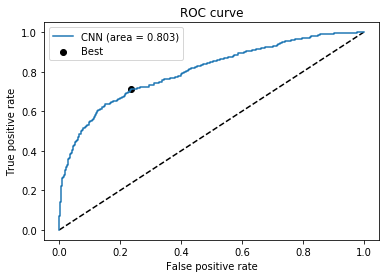

In [204]:
# Defino las métricas
false_positives, true_positives, thresholds = roc_curve(y_local_extended_test, y_pred_keras)
area_under_curve = auc(false_positives, true_positives)
gmeans = np.sqrt(true_positives * (1-false_positives))

# localiza el índice del mayor g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print("area_under_curve (AUC) = ", area_under_curve)
pintar_roc_curve(false_positives, true_positives)


conf_matrix =
 [[1271   89]
 [ 245  224]]


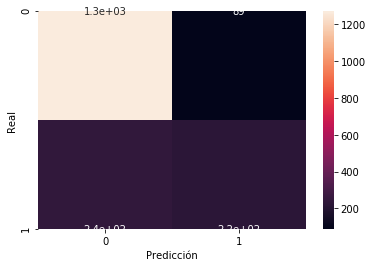

In [205]:
conf_matrix = confusion_matrix(y_local_extended_test, y_pred_keras_standart)
print("conf_matrix =\n", conf_matrix)

pintar_matriz_confusion(conf_matrix)

pd.DataFrame(conf_matrix).to_csv(basepath + '.csv')

In [206]:
#Umbral estándar
PhiM_Standart = matthews_corrcoef(y_local_extended_test, y_pred_keras_standart)
print("PhiM_Standart =", PhiM_Standart)

PhiM_Standart = 0.47787167495216726
